# Week 11: ML Review

### Setup

Run the following 2 cells to import all necessary libraries and helpers for this homework

In [1]:
!wget -q https://github.com/PSAM-5020-2025S-A/5020-utils/raw/main/src/data_utils.py
!wget -q https://github.com/PSAM-5020-2025S-A/5020-utils/raw/main/src/image_utils.py
!wget -qO- https://github.com/PSAM-5020-2025S-A/5020-utils/releases/latest/download/lfw.tar.gz | tar xz

In [19]:
from random import randint

from sklearn.metrics import classification_report

from data_utils import PCA, StandardScaler
from data_utils import RandomForestClassifier, SVC
from data_utils import LFWUtils
from data_utils import classification_error, display_confusion_matrix

from image_utils import make_image

import pandas as pd

## Face Unlock

Let's train a model to detect our face. We can think of this as a simpler version of one of the components inside something like the face ID software on our phones.

We'll skip the face detection part, which is when we find faces in an image, and assume we can get cropped and aligned faces out of images or video streams. We'll look at face detection later in the semester.

This is a slightly different kind of problem from the classification exercise we did in class, but the process is mostly the same.

We will use a dataset with other people's faces, but in the end we are only interested on how well our model detects our face.

### We Always Start with the Data

The dataset we're using is inside `./data/images/lfw/cropped`. It's a subset of the [Labeled Faces in the Wild](https://vis-www.cs.umass.edu/lfw/) dataset.

Take a look at the directory.

What's there?

How's the data organized and labeled?

### Loading the Data

Since we're not interested in generic classification, and measuring how we do on unlabeled data, this whole dataset is labeled, and we can read it into `train` and `test` subsets by calling the `train_test_split()` function of the `LFWUtils` class.

This function takes an optional parameter that specifies what portion of the data should be used for the `test` dataset. We can start with the default value of $0.5$.

In [ ]:
LFWUtils.LABELS
LFWUtils.L2I # list to index

{'annan': 0,
 'arroyo': 1,
 'berlusconi': 2,
 'blair': 3,
 'bushgw': 4,
 'bushl': 5,
 'chavez': 6,
 'clintonb': 7,
 'erdogan': 8,
 'fox': 9,
 'giuliani': 10,
 'jolie': 11,
 'koizumi': 12,
 'lopez': 13,
 'lula': 14,
 'mauresmo': 15,
 'moohyun': 16,
 'powell': 17,
 'putin': 18,
 'ryder': 19,
 'schwarzenegger': 20,
 'sukarnoputri': 21,
 'watts': 22,
 'williams': 23,
 'woods': 24}

In [3]:
train, test = LFWUtils.train_test_split(test_pct=0.5)

### Looking at the Data

Ok. Data is loaded.

What's in the data? How is it actually organized?

Take a look at the objects that were returned in each of the $2$ variables.

How big are our datasets?

Take a look at the `LABELS` and `L2I` members of the `LFWUtils` class.

In [10]:
# TODO: look at dataset objects. What's in them?
train.keys()
# TODO: how big are them?
len(train["labels"])
# TODO: how many labels do they have?
train["files"][:10]

['annan-008.jpg',
 'annan-028.jpg',
 'annan-003.jpg',
 'annan-001.jpg',
 'annan-009.jpg',
 'annan-024.jpg',
 'annan-026.jpg',
 'annan-002.jpg',
 'annan-007.jpg',
 'annan-025.jpg']

### Visualizing the Data

We can open some random images to make sure the content of our datasets make sense:

id: 4 
label: bushgw 
from: bushgw-041.jpg


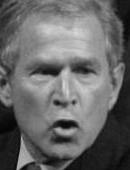

In [ ]:
train_size = len(train["labels"])
train_idx = randint(0, train_size - 1)

label_id = train["labels"][train_idx]

print("id:", label_id,
      "\nlabel:", LFWUtils.LABELS[label_id],
      "\nfrom:", train["files"][train_idx])

display(make_image(train["pixels"][train_idx], width=LFWUtils.IMAGE_SIZE[0]))

### Adding your images

Create a directory in the `dataset` directory for your images. Give it a one-word name, like your last name, your New School id or your initials. For example, mine is called `tgh` and is located at: `./data/images/lfw/cropped/tgh`.

Now, add between $20$ and $30$ images of your face to your directory. 

The images should be just like the ones that are already there for the other people:
- $130$ pixels wide by 
- $170$ pixels tall
- single-channel grayscale
- jpeg format
- named `label-number.jpg` (for example: `tgh-000.jpg`)

Feel free to do this manually using Photoshop or any other image editing software, but the easiest way is to use this interface that automatically crops faces out of pictures and creates images in the correct format:

[Face Align](https://huggingface.co/spaces/5020A/5020-FaceAlign-Gradio)

It will also align the faces and put the eyes in a consistent location. There's even an option to capture pictures from a live camera stream.

### Reload Dataset

Just run the `train_test_split()` again.

### PCA, Classification, etc etc etc

Now that we have added our images to the dataset, let's train a classifier and see how well it performs on not just classification, but on recognizing our face.

We can aim for an explained variance value of about $80\%$, and adjust that later if we find necessary.

Once we have the PCs for our training dataset in a `DataFrame` we can add a `label` column to it with the correct labels we have in `train["labels"]`.

We can also create a `DataFrame` for testing now by using the same `PCA` object to `transform()` the `test["pixels"]` data.

Since we won't train anything with the test dataset, it's ok to just keep the labels in `test["labels"]` as they are.

In [15]:
len(train["pixels"][0])

22100

In [27]:
# TODO: create PCA, fit and transform train data
# TODO: check PCA captured variance
# TODO: prepare DataFrame for training (add label column)
# TODO: create the test DataFrame by running PCA on the test data

face_pca = PCA(n_components=0.9999)
train_df = face_pca.fit_transform(train["pixels"])
print(face_pca.n_components, face_pca.explained_variance())

441 0.9999037121160139


In [28]:
train_labels_df = pd.DataFrame(train["labels"], columns=["labels"])
train_pca_df =  face_pca.transform(train["pixels"])

In [29]:
model_rf =RandomForestClassifier()
model_rf.fit(train_pca_df, train_labels_df["labels"])
train_predict = model_rf.predict(train_pca_df)

We can use the following cell to take a look at our images and their reconstructions.

This assumes the `DataFrame` is called `train_df` and the `PCA` object is called `face_pca`. Adjust these if necessary.

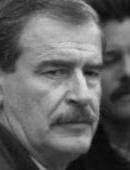

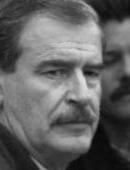

In [31]:
train_size = len(train["labels"])
train_idx = randint(0, train_size - 1)

# reconstruct image
pca_pixels = face_pca.inverse_transform(train_df.iloc[train_idx])

display(make_image(train["pixels"][train_idx], width=LFWUtils.IMAGE_SIZE[0]))
display(make_image(pca_pixels, width=LFWUtils.IMAGE_SIZE[0]))

In [32]:
# filter the DataFrame by our label
awesome_df = train_df[train_df["labels"] == LFWUtils.L2I["watts"]]

# save index of first image with our label
awesome_idx = awesome_df.index[0]

# reconstruct image
pca_pixels = face_pca.inverse_transform(awesome_df.iloc[0])

display(make_image(train["pixels"][awesome_idx], width=LFWUtils.IMAGE_SIZE[0]))
display(make_image(pca_pixels, width=LFWUtils.IMAGE_SIZE[0]))

KeyError: 'labels'

### Interpretation

<span style="color:hotpink;">
Do these make sense ? Do they look "recognizable" ? How do they change as a function of <code>n_components</code> ?
</span>

Now, back to classifying...

In [ ]:
# TODO: create a classifier
# TODO: separate input and output columns from the train DataFrame
# TODO: train model using train data and labels
# TODO: run prediction on train data

### Validate model with training data

In [ ]:
# measure classification error
print(classification_error(train["labels"], train_predictions))

# look at precision/recall from classification_report
print(classification_report(train["labels"], train_predictions))

# look at confusion matrix
display_confusion_matrix(train["labels"], train_predictions, LFWUtils.LABELS)

### Interpretation

<span style="color:hotpink;">
How does the confusion matrix look ? What does it mean ?
</span>

### Validate model with testing data

In [ ]:
# TODO: run prediction on test data
# TODO: measure classification error
# TODO: look at precision/recall from classification_report
# TODO: look at confusion matrix

### Interpretation

<span style="color:hotpink;">
How does THIS confusion matrix look ? What does it mean ? How does it perform for your pictures ?
</span>

### Precision and Recall

Accuracy, which is the complement of our `classification_error` value, is the measurement that is optimized during the `RandomForestClassifier` training process.

If we were training a regular classifier, we would look at `accuracy` (or `classification_error`) to determine if our model's performance is acceptable.

Since we're working on a personal face recognition model, we don't really care about overall accuracy, but instead are more interested in the `precision` and `recall` values for the classification of our particular images.

We don't want overall accuracy to be horrible, but we can be more specific in this case and be happy if the correct portion of our confusion matrix looks good.

Calculate the `precision` and `recall` values for the classification of your images.

In [ ]:
# TODO: calculate precision
# TODO: calculate recall

### Interpretation

<span style="color:hotpink;">
How is it performing for your images ? Which value, precision or recall, is higher ? What does that mean ?
</span>

We can run the following cell to see which classes have the highest `precision` and `recall` scores:

In [ ]:
display(LFWUtils.top_precision(test["labels"], test_predictions, top=5))
display(LFWUtils.top_recall(test["labels"], test_predictions, top=5))